# LOAN PREDICITON

#target fearture = Loan_Status

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns

# Data Collection & Data Preprocessing

In [2]:
data = pd.read_csv('train.csv')

In [3]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
#checking head,tail
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
data.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [6]:
#check no of rows and columns
data.shape

(614, 13)

In [7]:
#check statistical measures|values  (numerical data)
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
#checking missing value in each column
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

#Findings : Gender,Dependents,Self_Employed,LoanAmountLoan_Amount_Term,Credit_History features contain null values

In [9]:
# Dropping irrelevent feature
data.drop(columns=['Loan_ID','Dependents'],axis=1,inplace=True)

In [10]:
data

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


#loan_id is not relevant & Dependents is dropped because it contain values like 3+... & also it is not that much relevant.

In [11]:
#treating the missing values (categorical using mode)

data['Gender'] = data['Gender'].fillna(data['Gender'].mode()[0])
data['Married'] = data['Married'].fillna(data['Married'].mode()[0])
data['Education'] = data['Education'].fillna(data['Education'].mode()[0])
data['Self_Employed'] = data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])

In [12]:
data.isnull().sum()

Gender                0
Married               0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [13]:
#treating the missing values (numerical using mean)  
data['LoanAmount'] = data['LoanAmount'].fillna(data['LoanAmount'].mean())
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mean())
data['Credit_History'] = data['Credit_History'].fillna(data['Credit_History'].mean())

In [14]:
data.isnull().sum()

Gender               0
Married              0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Data Visualisation (categorical)

<AxesSubplot:xlabel='Education', ylabel='count'>

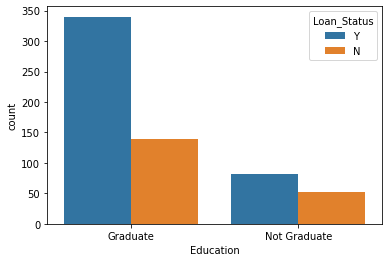

In [15]:
# Education & Loan_Status (this will visualise that the person who is graduate has the higher chances of getting the loan )
sns.countplot(x='Education',hue='Loan_Status',data=data)

In [16]:
# findings : there are some people who are not graduate but still they can get the loan . so continue for further Visualisation

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

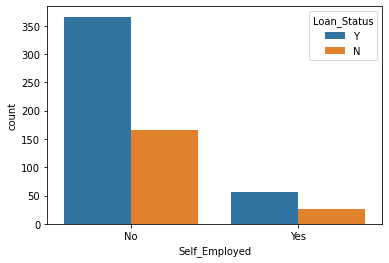

In [17]:
#Self_Employed and Loan_Status (this will visualise that the person who is employed has the higher chances of getting the loan)
sns.countplot(x='Self_Employed',hue='Loan_Status',data=data)

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

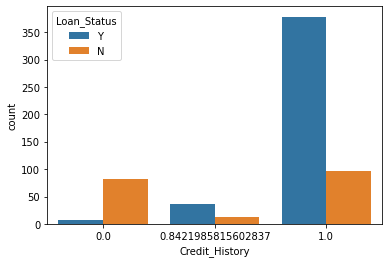

In [18]:
sns.countplot(x='Credit_History',hue='Loan_Status',data=data)

# Data Visualisation (numerical)

C:\Users\Hardik\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

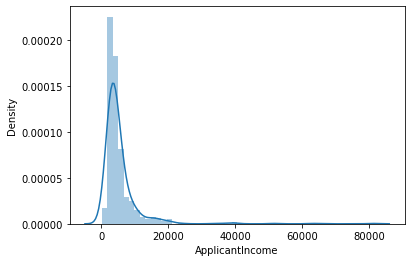

In [19]:

sns.distplot(data['ApplicantIncome'])

#findings : most of people having there income inbetween 1000 to 20000

C:\Users\Hardik\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

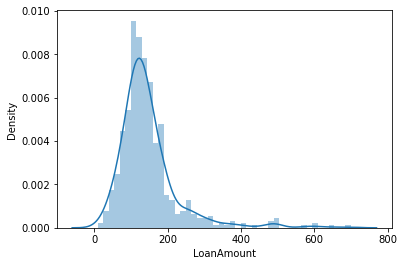

In [20]:
sns.distplot(data['LoanAmount'])

# Feature encoding

In [21]:
#converting categorical value to numerical value (using nominal encoding)
data['Gender']=data['Gender'].map({'Male':1,'Female':0})

In [22]:
data

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,No,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,1,Yes,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,1,Yes,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,1,Yes,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,1,No,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...
609,0,No,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,1,Yes,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,1,Yes,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,1,Yes,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


In [23]:
data['Married']=data['Married'].map({'Yes':1,'No':0})

In [24]:
data

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,1,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,1,1,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,1,1,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,1,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,1,1,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,1,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,1,1,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


In [25]:
data['Education']=data['Education'].map({'Graduate':1,'Not Graduate':0})

In [26]:
data

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,1,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,1,1,1,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,1,1,1,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,1,1,0,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,1,0,1,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,1,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,1,1,1,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,1,1,1,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,1,1,1,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


In [27]:
data['Self_Employed']=data['Self_Employed'].map({'Yes':1,'No':0})

In [28]:
data

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,1,0,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,1,1,1,1,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,1,1,0,0,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,1,0,1,0,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,1,0,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,1,1,1,0,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,1,1,1,0,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,1,1,1,0,7583,0.0,187.000000,360.0,1.0,Urban,Y


In [29]:
data['Loan_Status']=data['Loan_Status'].map({'Y':1,'N':0})

In [30]:
data

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,1,0,5849,0.0,146.412162,360.0,1.0,Urban,1
1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,Rural,0
2,1,1,1,1,3000,0.0,66.000000,360.0,1.0,Urban,1
3,1,1,0,0,2583,2358.0,120.000000,360.0,1.0,Urban,1
4,1,0,1,0,6000,0.0,141.000000,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,1,0,2900,0.0,71.000000,360.0,1.0,Rural,1
610,1,1,1,0,4106,0.0,40.000000,180.0,1.0,Rural,1
611,1,1,1,0,8072,240.0,253.000000,360.0,1.0,Urban,1
612,1,1,1,0,7583,0.0,187.000000,360.0,1.0,Urban,1


In [31]:
#Dropping irrelevant feature
Final=data.drop(columns = ['CoapplicantIncome','Property_Area'],axis=1)

In [32]:
Final

,Gender,Married,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,1,0,1,0,5849,146.412162,360.0,1.0,1
1,1,1,1,0,4583,128.000000,360.0,1.0,0
2,1,1,1,1,3000,66.000000,360.0,1.0,1
3,1,1,0,0,2583,120.000000,360.0,1.0,1
4,1,0,1,0,6000,141.000000,360.0,1.0,1
...,...,...,...,...,...,...,...,...,...
609,0,0,1,0,2900,71.000000,360.0,1.0,1
610,1,1,1,0,4106,40.000000,180.0,1.0,1
611,1,1,1,0,8072,253.000000,360.0,1.0,1
612,1,1,1,0,7583,187.000000,360.0,1.0,1


In [33]:
y = Final['Loan_Status']

In [34]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [35]:
X=Final.drop('Loan_Status',axis = 1)

In [36]:
X

,Gender,Married,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,1,0,1,0,5849,146.412162,360.0,1.0
1,1,1,1,0,4583,128.000000,360.0,1.0
2,1,1,1,1,3000,66.000000,360.0,1.0
3,1,1,0,0,2583,120.000000,360.0,1.0
4,1,0,1,0,6000,141.000000,360.0,1.0
...,...,...,...,...,...,...,...,...
609,0,0,1,0,2900,71.000000,360.0,1.0
610,1,1,1,0,4106,40.000000,180.0,1.0
611,1,1,1,0,8072,253.000000,360.0,1.0
612,1,1,1,0,7583,187.000000,360.0,1.0


# Model building

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=40)

In [39]:
X_train

,Gender,Married,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
157,1,1,1,0,9538,187.0,360.0,1.000000
197,0,0,0,0,1907,120.0,342.0,1.000000
368,1,1,1,0,6325,175.0,360.0,1.000000
504,1,1,0,0,3814,124.0,300.0,1.000000
44,1,1,0,1,4695,96.0,342.0,1.000000
...,...,...,...,...,...,...,...,...
440,1,0,1,0,3660,187.0,360.0,1.000000
165,1,1,1,0,3707,182.0,342.0,1.000000
7,1,1,1,0,3036,158.0,360.0,0.000000
219,0,1,1,0,4283,127.0,360.0,0.842199


# logistic regression

In [40]:
from sklearn.linear_model import LogisticRegression

In [41]:
model = LogisticRegression()

In [42]:
model.fit(X_train,y_train)

LogisticRegression()

In [43]:
y_pred = model.predict(X_test)

In [44]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [45]:
model.score(X_test,y_test)

0.7945945945945946

In [46]:
#evaluation
from sklearn.metrics import classification_report

In [47]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.33      0.49        54
           1       0.78      0.98      0.87       131

    accuracy                           0.79       185
   macro avg       0.84      0.66      0.68       185
weighted avg       0.82      0.79      0.76       185



In [48]:
from sklearn.metrics import confusion_matrix,precision_score,recall_score,accuracy_score

In [49]:
cm = confusion_matrix(y_test,y_pred)

In [50]:
cm

array([[ 18,  36],
       [  2, 129]], dtype=int64)

In [51]:
ps = precision_score(y_test,y_pred)

In [52]:
ps

0.7818181818181819

In [53]:
accuracy = accuracy_score(y_test,y_pred)

In [54]:
accuracy

0.7945945945945946

In [55]:
recall = recall_score(y_test,y_pred)

In [56]:
recall

0.9847328244274809

# Decision tree

In [62]:
from sklearn.model_selection import GridSearchCV

In [57]:
from sklearn.tree import DecisionTreeClassifier

In [58]:
model = DecisionTreeClassifier()

In [59]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [60]:
model.predict(X_test)

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1], dtype=int64)

In [61]:
model.score(X_test,y_test)

0.6810810810810811